# Equidistribution of algebraic integers having small height

### Roberto Gualdi

_Notebook run over SageMath 9.7_

## Abstract

This notebook provides a visualization for the equidistribution theorem by Bilu [Bil97], in a special one-dimensional case.

More precisely, **we consider algebraic integers with arbitrarily small height, and graphically show that their Archimedean Galois orbits approach the unit circle in the complex plane.**

In order to do this, we give a function that fabricates a random monic irreducible univariate polynomial $f$ over $\mathbb{Z}$, with given degree $d$ and such that all its coefficients have absolute value bounded by a given positive integer $B$.
As remarked in [Ejemplo 6, Gua23], the height of any zero $x$ of $f$ is upper bounded by

$$
\frac{\log(d+1)+2\log B}{2d}\,,
$$

while the Archimedean Galois orbit of the algebraic integer $x$ agrees with the set of complex zeros of $f$.
As a result, for a fixed $B$ the height of $x$ approaches zero as the degree of $f$ grows, and Bilu's theorem predicts the equidistribution of the complex roots of $f$ with respect to the Haar measure on

$$
\mathbb{S}=\{z\in\mathbb{C}\mid|z|=1\}\,.
$$

This is evident in the outputs of the function `zeros_random_monic_irreducible_polynomial` that we here define.

## The code

### Initialization

We start by setting the algebraic framework needed to run the code.

In [1]:
R.<x> = PolynomialRing(QQ)

### Finding monic irreducible polynomials

Our first goal is to be able to construct random polynomials with some given features.

To do this we define the function `random_monic_irreducible_polynomial`.
It takes as input two positive integers $d$ and $B$, and produces a random monic irreducible polynomial of degree $d$, with integer coefficients having absolute value at most $B$.

In [2]:
def random_monic_irreducible_polynomial(d,B):
    
    # We initialize the boolean variable checking the irreducibility of the polynomial
    
    Irr = False
    
    # We also initialize the the vector of coefficients of the polynomial. Since
    # we look for monic polynomials, we set the leading coefficient to be 1
    
    a = vector(ZZ,d+1)
    a[d] = 1
    
    # Let us run the following code until we find an irreducible polynomial
    
    while Irr == False:
        
        # To each entry of the vector, excluding the one corresponding to the leading
        # term, we assign a random integer number between -B and B (extreme included)
        
        for i in [0..d-1]:
            a[i] = ZZ.random_element(-B,B+1)
        
        # We can construct the polynomial in the ring Q[x] having coefficients
        # the element of the vector a, and check whether it is irreducible
        
        f = R(list(a))
        Irr = f.is_irreducible()
    
    # If we leave the "while" cycle, then the polynomial f is irreducible,
    # and we can return it as result of the function
    
    return f

### Picturing zeros

The second function we define is `zeros_random_monic_irreducible_polynomial`. It takes as input two positive integers $d$ and $B$, and draws in the complex plane the zeros of a random monic irreducible polynomial of degree $d$ and with infinite norm upper bounded by $B$.
Such a random polynomial is produced using the function `random_monic_irreducible_polynomial`.

By the discussion in the abstract, the picture represents the Archimedean Galois orbit of an algebraic integer with height upper bounded by

$$\frac{\log(d+1)+2\log B}{2d}\,.$$

In [3]:
def zeros_random_monic_irreducible_polynomial(d,B):
    
    # We initialize the vector of complex zeros of the polynomial. They are d-many
    
    Sol = vector(CC,d)
    
    # We produce a random monic irreducible polynomial using the above function
    # and we communicate it to the user, also promising a picture of its roots 
    
    f = random_monic_irreducible_polynomial(d,B)
    
    print('The polynomial')
    print('')
    print(f)
    print('')
    print('is irreducible of degree ', d,'. Its complex roots are depicted here:')
    
    # We now compute the complex roots of the polynomial. Since we do not need
    # any exact symbolic result in the following, we are satisfied with the 
    # floating-point approximation offered by the command f.roots(CC)
    
    S = f.roots(CC)
    
    # The entries of S are pairs made of a root of f and its corresponding multiplicity.
    # Since Q is a perfect field, the multiplicity of each root is guaranteed to be 1,
    # so we can safely ignore it when collecting the roots of f in the vector Sol
    
    for i in [0..d-1]:       
        Sol[i] = S[i][0]
        
    # We can finally represent these roots in the complex plane
    
    show(point(Sol),aspect_ratio=1)

We can test the function in a baby case.

The polynomial

x^4 + x^3 - 1

is irreducible of degree  4 . Its complex roots are depicted here:


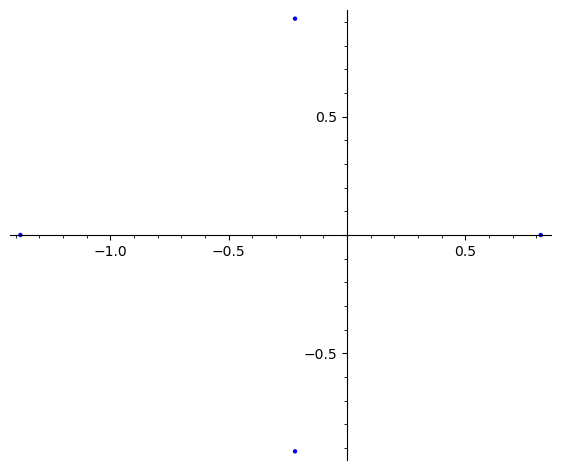

In [4]:
zeros_random_monic_irreducible_polynomial(4,1)

Nothing prevents us from applying the function to higher degrees.

The polynomial

x^100 - x^99 - x^97 + x^95 - x^91 - x^90 + x^88 - x^87 - x^85 + x^84 + x^83 + x^80 + x^79 - x^78 - x^76 - x^74 - x^73 - x^70 + x^69 + x^68 + x^67 - x^65 + x^64 - x^63 - x^62 - x^61 + x^60 - x^59 - x^57 - x^56 - x^55 + x^53 - x^52 + x^49 - x^47 - x^45 - x^41 - x^39 - x^38 + x^37 + x^36 + x^35 + x^34 - x^33 - x^32 + x^30 + x^29 - x^28 + x^27 + x^25 - x^24 + x^23 - x^22 - x^21 + x^20 - x^18 + x^16 - x^15 - x^13 - x^12 + x^11 - x^10 - x^9 + x^7 + x^6 + x^5 - x^3 + x^2 - 1

is irreducible of degree  100 . Its complex roots are depicted here:


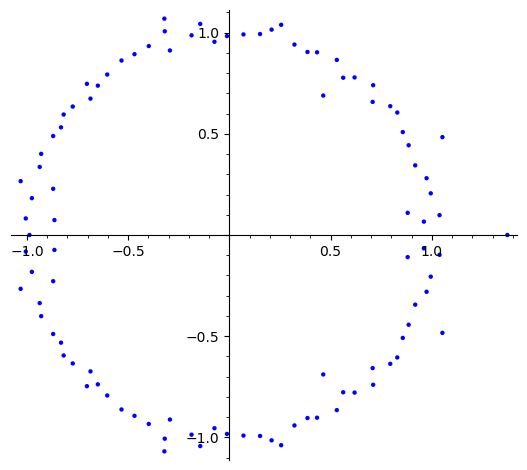

In [5]:
zeros_random_monic_irreducible_polynomial(100,1)

### A visualization of the equidistribution theorem

At last, we would like to allow the user to represent zeros of several distinct monic irreducible polynomials with a single command.

To this end we define the function `zeros_of_various_random_irreducible_polynomials`.
It takes as input a vector of positive integers $v$ and a uniform integral bound $B$ for the coefficients.
For each entry $d$ of $v$, the function construct a random monic irreducible polynomial of degree $d$, with integer coefficients having absolute value at most $B$, and depicts its roots in the complex plane.

For a more pleasant graphical rendering, the pictures are cutted in a squared neighbourhood of the origin.

In [6]:
def zeros_of_various_random_irreducible_polynomials(v,B):
    
    # We simply need to repeat the steps from the previous function,
    # taking the degree d of polynomials from the vector v
    
    for j in [0..len(v)-1]:
        
        d = v[j]
        Sol = vector(CC,d)
        
        f = random_monic_irreducible_polynomial(d,B)
        
        S = f.roots(CC)
        
        for i in range(d):          
            Sol[i] = S[i][0]
            
        # When representing the roots, we just draw the ones whose
        # real and imaginary parts are enclosed between -1.2 and 1.2
            
        show(point(Sol), aspect_ratio=1, xmin=-1.2, xmax=1.2, ymin=-1.2, ymax=1.2)

Set for instance $B=2$ and consider a vector of increasing degrees.
Applying the above function with these parameters we can appreciate the tendency of the roots to equidistribute along the unit circle, as predicted by Bilu's theorem.

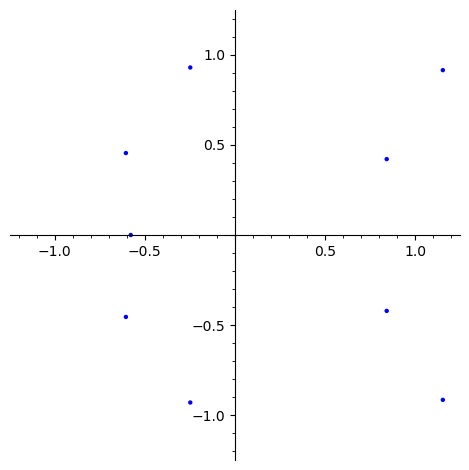

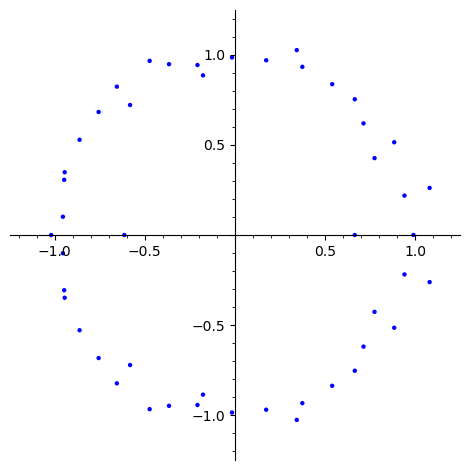

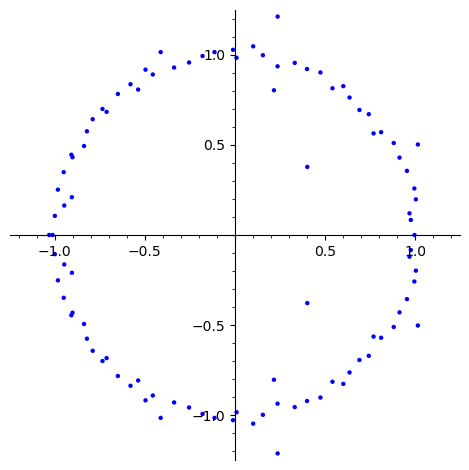

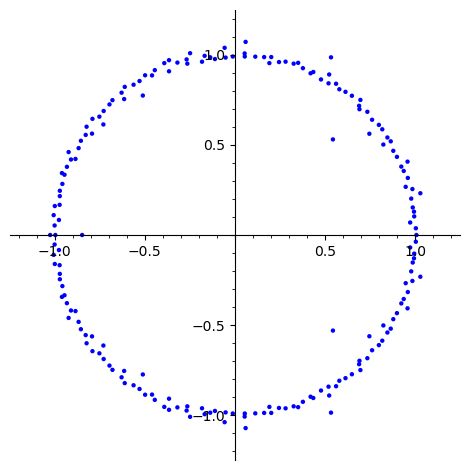

In [7]:
zeros_of_various_random_irreducible_polynomials([10,50,100,200],2)

## References

[Bil97]    Yu. Bilu, ''_Limit distribution of small points on algebraic tori_'', Duke Math. J. **89** (3), p. 465-476 (1997).

[Gua23]     R. Gualdi, ''_¿Cuantas raices de la unidad anulan un polinomio en dos variables?_'', Gac. R. Soc. Mat. Esp. **26**, p. 149-172 (2023).